In [578]:
import math
# Run some setup code for this notebook.

import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.preprocessing as preprocessing

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [579]:
# Limit the number of rows printed in output to 10
pd.options.display.max_rows = 10

# Load dataset from csv file in ./data/data.csv
# The first row is the header
data = pd.read_csv('data/data.csv')

# drop the 'customerID' column
data = data.drop('customerID', axis=1)

data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


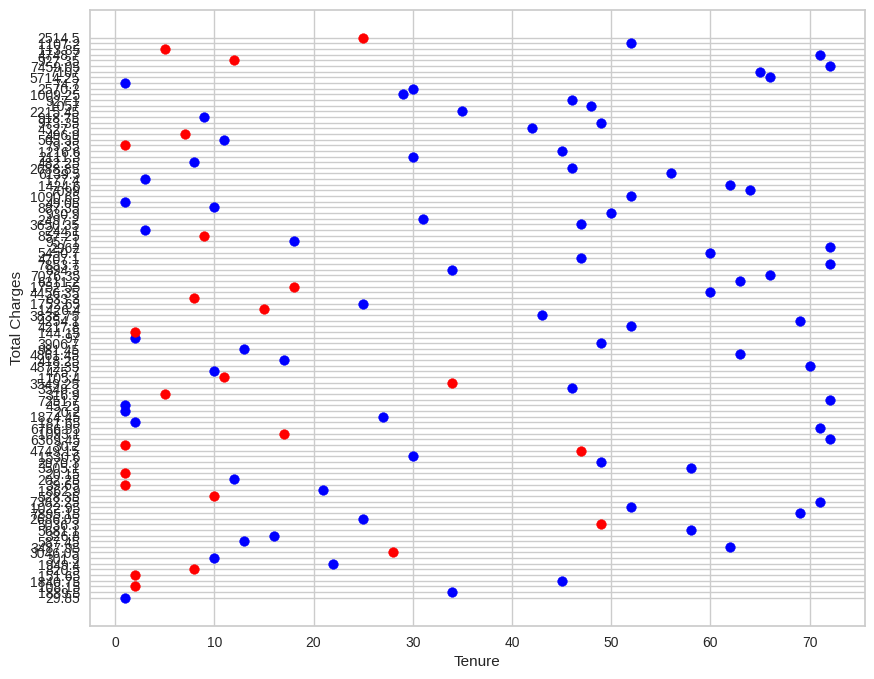

In [580]:
# plot the TotalCharges column against the contract length column
# and color the points based on the churn column
for (_x, _y, _churn) in \
        zip(data['tenure'].head(100).values,
            data['TotalCharges'].head(100).values,
            data['Churn'].head(100).values):
    if _churn == 'No':
        plt.scatter(_x, _y, c='blue')
    else:
        plt.scatter(_x, _y, c='red')
plt.xlabel('Tenure')
plt.ylabel('Total Charges')
plt.show()

In [581]:
# define the label encoder
le = preprocessing.LabelEncoder()

# go through each column and encode the labels
for col in data.columns:
    data[col] = le.fit_transform(data[col])

data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,925,1


In [582]:
# identify the 'churn' column as the target
target = data['Churn']
label = target.values

# drop the 'churn' column from the data
data = data.drop('Churn', axis=1)
x = data.values

data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,2505
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,1466
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,157
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,1400
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,925


In [583]:
# normalize the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
x = scaler.fit_transform(x)

## FYI: Normalizing the data brought a 2.6% improvement in accuracy

In [584]:
from sklearn.model_selection import train_test_split

split_value = 0.75

# split the dataset 75 - 25
train_x, test_x, train_y, test_y = train_test_split(x, label, test_size=(1 - split_value), random_state=42)

print(f"Samples in train dataset: {len(train_x)}")
print(f"Samples in test dataset: {len(test_x)}")
print(f"Labels in train dataset: {len(train_y)}")
print(f"Labels in test dataset: {len(test_y)}")

Samples in train dataset: 5282
Samples in test dataset: 1761
Labels in train dataset: 5282
Labels in test dataset: 1761


In [585]:
# create a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
from math import sqrt
from math import floor

# optimal number of neighbors is the square root of the number of data points
query_num = floor(sqrt(len(data)))

# create a classifier
knn = KNeighborsClassifier(n_neighbors=query_num, weights='distance')

# fit the classifier to the training data
knn.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=83, weights='distance')

In [586]:
# predict the probabilities for each entry
knn.predict_proba(test_x)

array([[0.480476  , 0.519524  ],
       [0.90419864, 0.09580136],
       [1.        , 0.        ],
       ...,
       [0.78152107, 0.21847893],
       [0.37293725, 0.62706275],
       [0.40646376, 0.59353624]])

In [587]:
# evaluate the accuracy of the model
from sklearn.metrics import accuracy_score

# make predictions on the test set
predictions = knn.predict(test_x)

print(f"Accuracy: {accuracy_score(test_y, predictions)}")

Accuracy: 0.7802385008517888


## Order of the columns in the dataset matters because the KNN algorithm
## calculates the distance between the data points. If the order of the columns
## is different, the distance will be different. We will try to see if the order
## of the columns will affect the accuracy of the model

In [588]:
# function that prioritizes age of the customer and the contract length
def swap_function():

    # get the index of the tenure column
    tenure_index = data.columns.get_loc('tenure')

    # get the index of the total charges column
    charges_index = data.columns.get_loc('TotalCharges')

    # swap the tenure to be the first column
    data.iloc[:, [0, tenure_index]] = data.iloc[:, [tenure_index, 0]]

    # swap the charges to be the second column
    data.iloc[:, [1, charges_index]] = data.iloc[:, [charges_index, 1]]

In [589]:
swap_function()

# update x
x = data.values
x = scaler.fit_transform(x)

# multiply the first column by 2 and the second column by 3 to make them more important
# x[:, 0] = x[:, 0] * 2
x[:, 1] = x[:, 1] * 3

# split the new dataset 75 - 25
train_x, test_x, train_y, test_y = train_test_split(x, label, test_size=(1 - split_value), random_state=42)

weighted_knn = KNeighborsClassifier(n_neighbors=query_num, weights='distance')
# fit the new data
weighted_knn.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=83, weights='distance')

In [590]:
# make predictions on the test set
predictions = weighted_knn.predict(test_x)

print(f"Accuracy: {accuracy_score(test_y, predictions)}")

Accuracy: 0.7859170925610448


### As we can see, the accuracy of the model has slightly improved
## We will try to see if giving it fewer data will improve the accuracy

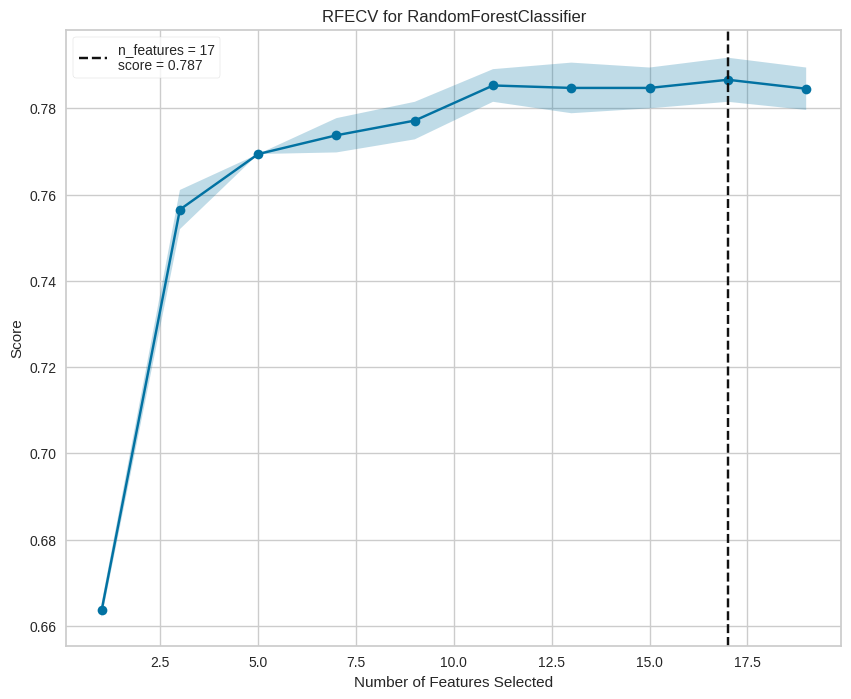

In [592]:
# now try model_selection
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import rfecv
from sklearn.ensemble import RandomForestClassifier

cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)
visualizer = rfecv(RandomForestClassifier(), X=train_x, y=train_y, cv=cv, scoring='accuracy', step=2)

## The improvement is not significant